In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as np
import numpy as np
import plotly.express as px
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [ ]:
import pandas as pd
import io
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,2,9,9,2020,4,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
df = tabla[["EDAD_PADRE", "EDAD_MADRE", "N_HIJOSV","N_EMB"]]
df.head(3)

,EDAD_PADRE,EDAD_MADRE,N_HIJOSV,N_EMB
COD_DPTO,,,,
44,20,4,1,1
44,20,4,1,1
44,20,5,1,1


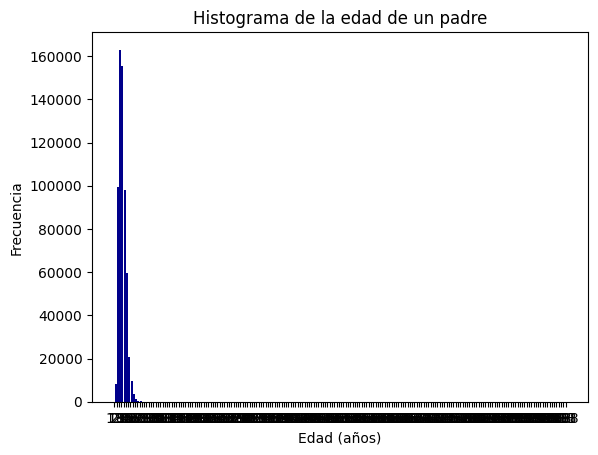

In [ ]:
import matplotlib.pyplot as plot
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5) #Construimos los extremos de los intervalos, cada 5 años.
plot.hist( x = df.EDAD_PADRE, bins = intervalos, color = 'darkblue', rwidth = 0.85 )
plot.title('Histograma de la edad de un padre')
plot.xlabel('Edad (años)')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
plot.show()


In [ ]:
df1 = df[(df.EDAD_PADRE<120) & (df.EDAD_MADRE != 99) & (df.N_HIJOSV != 99) & (df.N_EMB !=99)]
df1.head(5)


,EDAD_PADRE,EDAD_MADRE,N_HIJOSV,N_EMB
COD_DPTO,,,,
44,20,4,1,1
44,20,4,1,1
44,20,5,1,1
44,20,5,1,1
44,20,3,1,1


<ipython-input-21-5d8367287299>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth = 2, label = 'Distribución normal ', color = "darkblue")


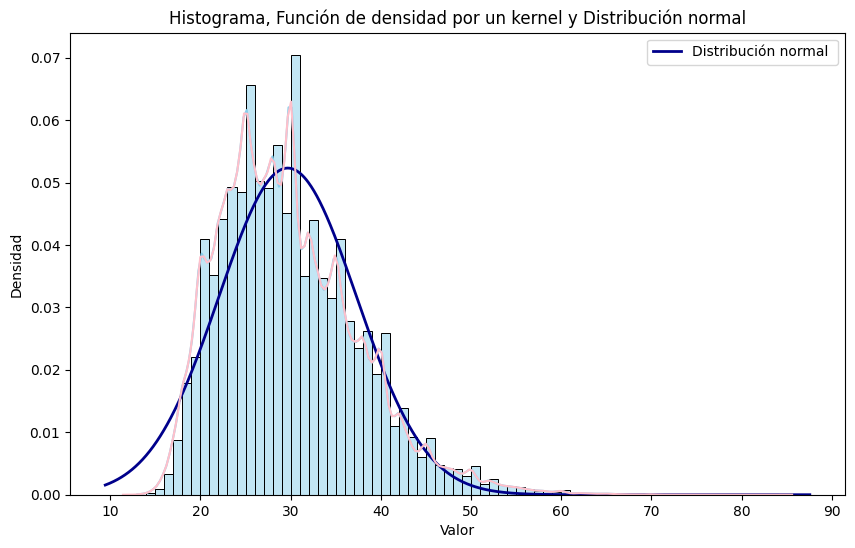

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plot.figure(figsize=(10,6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = 'density', color = 'skyblue', edgecolor = 'black'  ) #kde = True significa que es la gráfica de función de probabilidad estimada por un método kernell

xmin, xmax = plt.xlim() #Gráfica de distribución normal
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE)) #gráfica de función de densidad de probabilidad de la distribución normal

plt.plot(x, p, 'k', linewidth = 2, label = 'Distribución normal ', color = "darkblue")
sns.kdeplot(x = df1.EDAD_PADRE, color = "pink")
plt.title('Histograma, Función de densidad por un kernel y Distribución normal')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
#Mostrar gráfico
plt.show()


# Sea $ X:=$ Edad del padre de un recién nacido en Colombia.

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método kernell (color rosado), no coincide con la función de probabilidad  asumiendo el supuesto de normalidad (línea azul),  $X\sim \text{Normal} (\text{Media} = \bar{X}, \text{Varianza} = S^2_x)$. Entonces no asumimos normalidad de acuerdo con las gráficas.


In [ ]:
from scipy.stats import shapiro
shapiro(df1.EDAD_PADRE)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9588152766227722, pvalue=0.0)

* Si el **valor p** en una prueba de hipótesis es menor a 0.05, se rechaza la hipótesis nula con la confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor a 0.05, no se rechaza la hipótesis nula con la confianza del 95%

En nuestro caso tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variable aleatoria $X$, la cual corresponde a la edad de un padre de un recién nacido en Colombia presenta distribución normal.


In [ ]:
df1.EDAD_PADRE.count()#Cuando tenemos muchísimos datos, siempre se rechaza la hipótesis nula.

619927

In [ ]:
idx = np.random.randint(len(df1.EDAD_PADRE), size = 100)#Número del padre encuestado
shapiro(df1.EDAD_PADRE.index[idx])


ShapiroResult(statistic=0.8799921870231628, pvalue=1.813487529034319e-07)

En nuestro caso particular, se tiene que nuestro valor p es $1.3588263847452708 \times 10^{-7}$ que es menor a 0.05 , es decir que se rechaza la hipótesis de que la edad una padre en Colombia presenta distribución normal.

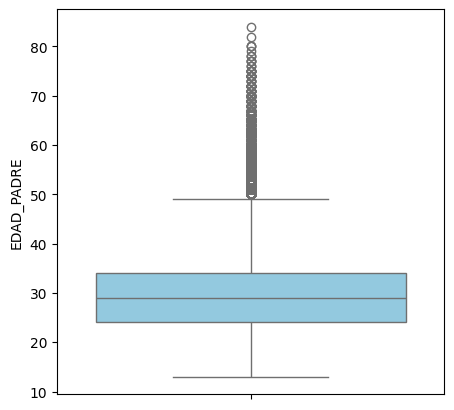

In [ ]:
import seaborn
plot.figure(figsize = (5,5))
seaborn.boxplot(df1.EDAD_PADRE, color = 'skyblue', saturation = 0.75)
plt.show()


Se considera que la edad de un padre de un recién nacido en Colombia, es atípica, si es mayor que 50. El primer cuartil es aproximadamente en 25 años, La media aritmética aproximdamente en 28 años, y el tercer cuartil en los 35 años.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} = 35 - 25 = 10$


In [ ]:

import plotly.express as px
plt.figure(figsize=(5, 5))
fig = px.strip(df1.EDAD_PADRE, orientation = 'h')
fig.show()


De acuerdo con el diagrama de puntos, se observa una alta variabilidad de la edad de un padre de un recién nacido en Colombia.

In [ ]:
#Medidas descriptivas
from scipy.stats import skew , kurtosis
print(f"Media : {np.mean(df1.EDAD_PADRE)} ")
print(f"Varianza : {np.var(df1.EDAD_PADRE)}  y la desviación estándar es de {np.std((df1.EDAD_PADRE))}")
print(f"Asimetría : {skew(df1.EDAD_PADRE)} ")
print(f"Curtosis : {kurtosis(df1.EDAD_PADRE)} ")


Media : 29.677295875159494 
Varianza : 58.13789861018038  y la desviación estándar es de 7.624821218243768
Asimetría : 0.8352990464451435 
Curtosis : 0.9739082717645751 


*   Aproximadamente la media de edad de un padre de un recién nacido en Colombia es de 29 años.
*   Aproximadamente la distancia entre los valores de la edad de un padre de un recién nacido en Colombia y la media es 7.62 años.

*   La distribución de la edad de un padre de un recién nacido en Colombia es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
*  La distribución es platicúrtica, es decir, hay una baja concentración de las edades de un padre de un recién nacido en Colombia con respecto a la media.


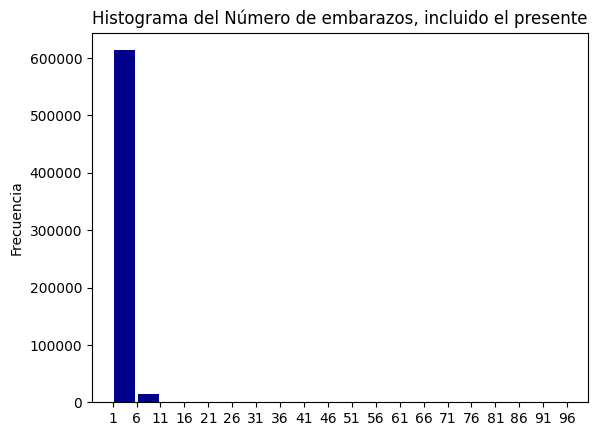

In [ ]:
import matplotlib.pyplot as plot
intervalos = range(min(df.N_EMB), max(df.N_EMB) + 1, 5)#Construimos los extremos de los intervalos, cada 5 años.
plot.hist( x = df.N_EMB, bins = intervalos, color = 'darkblue', rwidth = 0.85 )
plot.title('Histograma del Número de embarazos, incluido el presente')
plot.xlabel('')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
plot.show()


<ipython-input-30-6af513614a2c>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth = 2, label = 'Distribución normal ', color = "darkblue")


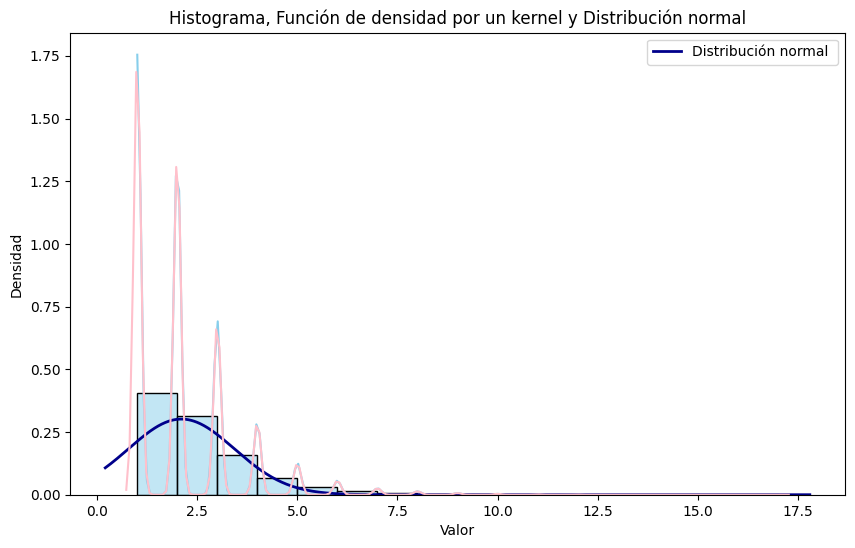

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
intervalos1 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plot.figure(figsize=(10,6))
sns.histplot(x = df1.N_EMB, bins = intervalos1, kde = True, stat = 'density', color = 'skyblue', edgecolor = 'black'  ) #kde = True significa que es la gráfica de función de probabilidad estimada por un método kernell

xmin, xmax = plt.xlim() #Gráfica de distribución normal
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB)) #gráfica de función de densidad de probabilidad de la distribución normal

plt.plot(x, p, 'k', linewidth = 2, label = 'Distribución normal ', color = "darkblue")
sns.kdeplot(x = df1.N_EMB, color = "pink")
plt.title('Histograma, Función de densidad por un kernel y Distribución normal')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
#Mostrar gráfico
plt.show()


# Sea $ X:=$ Número de embarazos, incluido el presente.

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método kernell (color rosado), no coincide con la función de probabilidad  asumiendo el supuesto de normalidad (línea azul),  $X\sim \text{Normal} (\text{Media} = \bar{X}, \text{Varianza} = S^2_x)$. Entonces no asumimos normalidad de acuerdo con las gráficas.


In [ ]:
from scipy.stats import shapiro
shapiro(df1.N_EMB)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.774432361125946, pvalue=0.0)

* Si el **valor p** en una prueba de hipótesis es menor a 0.05, se rechaza la hipótesis nula con la confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor a 0.05, no se rechaza la hipótesis nula con la confianza del 95%

En nuestro caso tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variable aleatoria $X$, la cual corresponde al número de embarazos incluido el presente,  presenta distribución normal.


In [ ]:
df1.N_EMB.count()#Cuando tenemos muchísimos datos, siempre se rechaza la hipótesis nula.

619927

In [ ]:
idx = np.random.randint(len(df1.N_EMB), size = 100)#Muestra de nuestro conjunto de datos
shapiro(df1.N_EMB.index[idx])


ShapiroResult(statistic=0.8658463358879089, pvalue=4.783734297575393e-08)

Seguimos teniendo que nuestro valor p es menor que 0.05, por lo tanto se rechaza la idea de que nuestro conjunto de datos presenta una distribución normal.

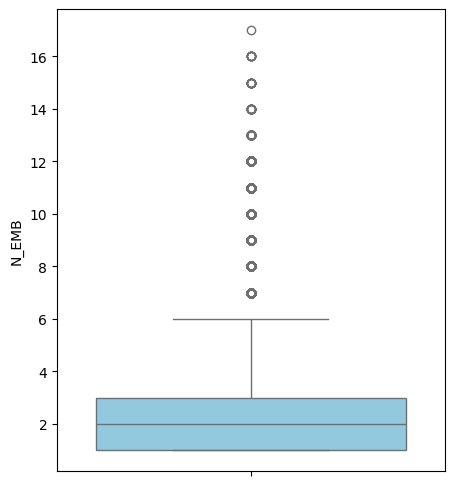

In [ ]:
import seaborn
plot.figure(figsize = (5,6))
seaborn.boxplot(df1.N_EMB, color = 'skyblue', saturation = 0.75)
plt.show()


In [ ]:
#Medidas descriptivas
from scipy.stats import skew , kurtosis
print(f"Media : {np.mean(df1.N_EMB)} ")
print(f"Varianza : {np.var(df1.N_EMB)}  y la desviación estándar es de {np.std((df1.N_EMB))}")
print(f"Asimetría : {skew(df1.N_EMB)} ")
print(f"Curtosis : {kurtosis(df1.N_EMB)} ")


Media : 2.102028142023174 
Varianza : 1.7488844977183355  y la desviación estándar es de 1.3224539680905099
Asimetría : 1.9222980439592752 
Curtosis : 6.016463802431733 


*   Aproximadamente la media del número de embarazos incluido el presente en Colombia es 2.
*   Aproximadamente la distancia entre los valores del número de embarazos incluido el presente en Colombia y la media es 1.74.

*   La distribución de número de embarazos incluido el presente en Colombia es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
*  La distribución es leptocúrtica, es decir, hay una alta concentración del número de embarazos incluido el presente en Colombia con respecto a la media.


**Diagrama de dispersión y recta de regresión para datos bivariados**

.Vamos a revisar si una variable esta correlacionada o depende de otra

.Una variable depende de la otra cuando la ejecucción de esta se ve afectada por la variable independiente. Ejemplo: El precio de una vivienda depende del número de habitaciones, entre más habitaciones mayor precio.

.Una variable esta correlacionada con otra cuando guardan cierta relacion pero no es posible hablar de dependecia. Ejemplo: Consumo de arroz y de carne, ya que al comer mas arroz se come mas carne pero no hay una dependencia entre estas dos variables

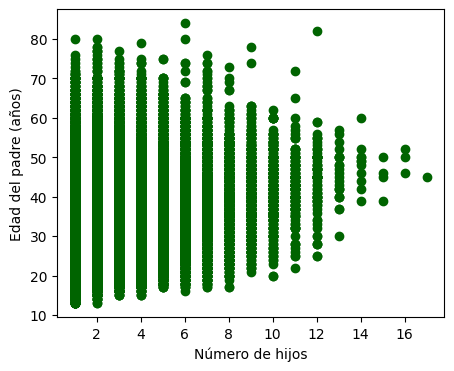

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(df1["N_HIJOSV"], df1["EDAD_PADRE"], color = "darkgreen", marker = "o")
plt.xlabel("Número de hijos")
plt.ylabel("Edad del padre (años)")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(np.array(df1["N_HIJOSV"]).reshape(-1,1), np.array(df1["EDAD_PADRE"]).reshape(-1,1))
predi_lineal = modelo.predict(np.array(df1["N_HIJOSV"]).reshape(-1,1))


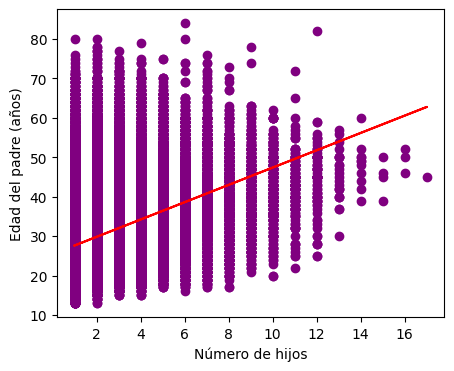

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(df1["N_HIJOSV"], df1["EDAD_PADRE"], color = "purple", marker = "o")
plt.plot(df1["N_HIJOSV"], predi_lineal, linestyle = "-", color = "red")
plt.xlabel("Número de hijos")
plt.ylabel("Edad del padre (años)")
plt.show()

De acuerdo con la recta de regresión, se determina que entre más hijos tiene una persona más años tiene dicha persona, hay una correlación positiva, es decir, entre mas hijos tiene un hombre en Colombia más años tiene esta persona

In [ ]:
from scipy.stats import spearmanr, kendalltau
coef_pearson = np.corrcoef(df1["N_HIJOSV"], df1["EDAD_PADRE"])[0, 1]
coef_spearman, _ = spearmanr(df1["N_HIJOSV"], df1["EDAD_PADRE"])
coef_kendall, _ = kendalltau(df1["N_HIJOSV"], df1["EDAD_PADRE"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson}, {coef_spearman} y {coef_kendall}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.33990792776474427, 0.36455242015012745 y 0.2875729083114768.


Para la interpretcaión de los coeficientes de correlación nos ayudaremos de la referencia:

 Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://pdfs.semanticscholar.org/7e73/43a5608fff1c68c5259db0c77b9193f1546d.pdf)


* X y Y son independientes o no estan correlacionadas:  $\rho (X,Y) \approx 0, \eta (X,Y) \approx 0, \kappa (X,Y) \approx 0$
* Y depende insignificantemente de X o X y Y están insignificantemente correlacionadas si $0 < \vert \rho (X,Y) \vert < 0.2$, $0 < \vert \eta (X,Y) \vert < 0.2$, $0 < \vert \kappa (X,Y) \vert < 0.2$
* Y depende discretamente de X o X y Y están discretamente correlacionadas si $0.2 < \vert \rho (X,Y) \vert < 0.4$, $0.2 < \vert \eta (X,Y) \vert < 0.4$, $0.2 < \vert \kappa (X,Y) \vert < 0.4$
* Y depende moderadamente de X o X y Y están moderadamente correlacionadas si $0.4 < \vert \rho (X,Y) \vert < 0.6$, $0.4 < \vert \eta (X,Y) \vert < 0.6$, $0.4 < \vert \kappa (X,Y) \vert < 0.6$
* Y depende sustancialmente de X o X y Y están sustancialmente correlacionadas si $0.6 < \vert \rho (X,Y) \vert < 0.8$, $0.6 < \vert \eta (X,Y) \vert < 0.8$, $0.6 < \vert \kappa (X,Y) \vert < 0.8$
* Y depende fuertemente de X o X y Y están fuertemente correlacionadas si $0.8 < \vert \rho (X,Y) \vert < 1$, $0.8 < \vert \eta (X,Y) \vert < 1$, $0.8 < \vert \kappa (X,Y) \vert < 1$


De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el número de hijos de un padre y la edad de un padre de un recién nacido en Colombia, están discretamente correlacionadas